<a href="https://colab.research.google.com/github/WyvernCore/ICS3206---Machine-Learning-Expert-Systems-and-Fuzzy-Logic/blob/main/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing required libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import tree

### Uploading csv file to Google Colab

In [1]:
from google.colab import files 
uploaded = files.upload() #Used to upload csv file into Google Colab session

Saving voice.csv to voice.csv


### Checking CSV file contents

In [3]:
df = pd.read_csv('voice.csv') #loading the csv file using panda

In [4]:
df.head() #checking the head of the csv file

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [7]:
df.dtypes == 'object'
num_vars = df.columns[df.dtypes != 'object']

In [8]:
df[num_vars].isnull().sum() #Checking for any missing data within dataset

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
dtype: int64

In [23]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3163    False
3164    False
3165    False
3166    False
3167    False
Length: 3168, dtype: bool

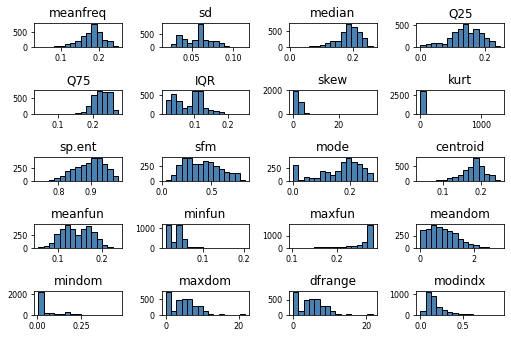

In [ ]:
df.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))  

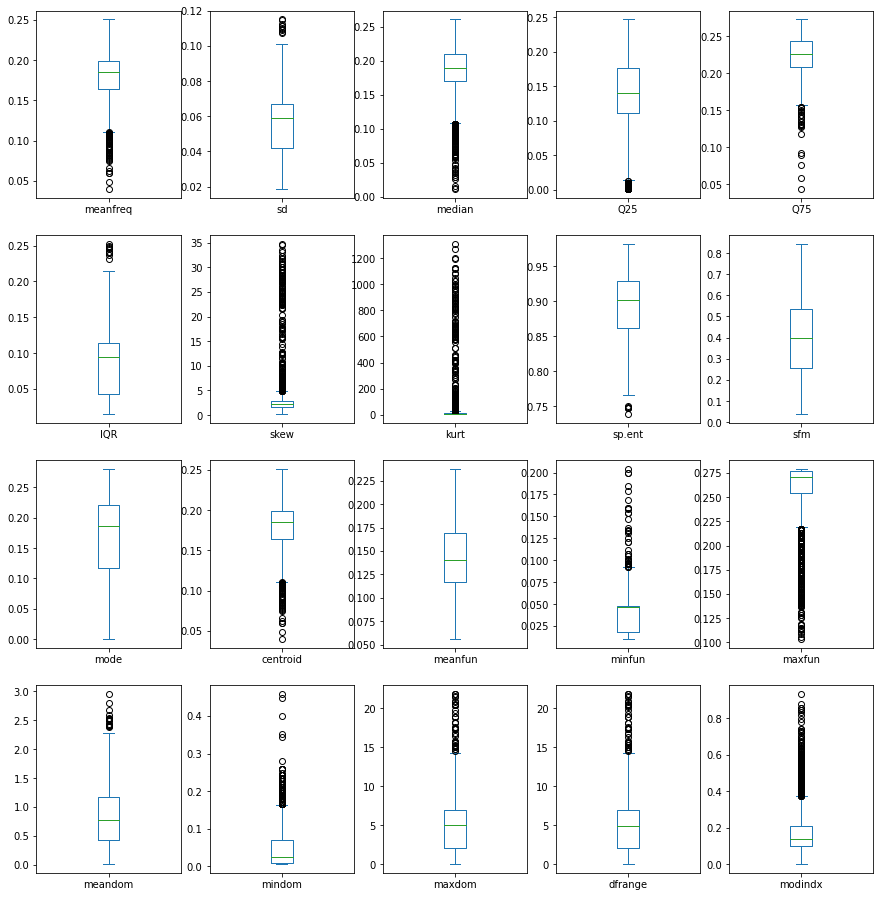

In [ ]:
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,20));

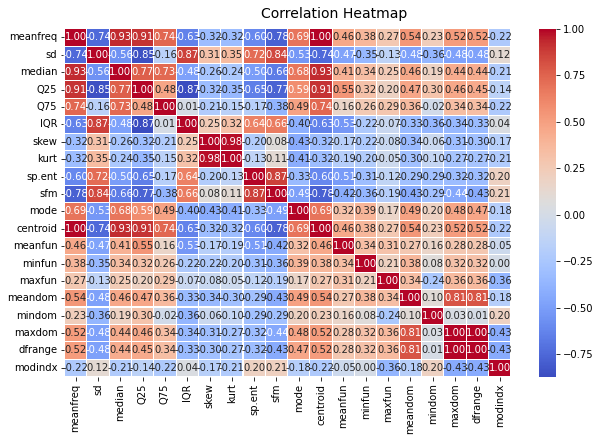

In [ ]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlation Heatmap', fontsize=14)

In [ ]:
df.dtypes == 'object'
num_vars = df.columns[df.dtypes != 'object']
print(num_vars)

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx'],
      dtype='object')


In [ ]:
y = df.label #get the label of each row 
y.head()

0    male
1    male
2    male
3    male
4    male
Name: label, dtype: object

### Standardizing Data

In [ ]:
scaler = StandardScaler()
x = df.iloc[:,:-1]
y = df.label #get the label of each row 

df_scaled = scaler.fit_transform(x.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=num_vars)
df_scaled = df_scaled.assign(label=y.values)
df_scaled.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,-4.049248,0.427355,-4.224901,-2.576102,-5.693607,-0.214778,2.293306,1.762946,-0.039083,0.471575,...,-4.049248,-1.812038,-1.097998,0.565959,-1.564205,-0.708404,-1.431422,-1.419137,-1.454772,male
1,-3.841053,0.611669,-3.999293,-2.486885,-5.588987,-0.258485,4.548056,4.433008,-0.065236,0.594431,...,-3.841053,-1.079594,-1.091533,-0.294030,-1.561916,-0.708404,-1.418107,-1.405818,-1.014103,male
2,-3.463066,1.603848,-4.095851,-2.706986,-3.928699,0.909326,6.513656,7.326207,-1.083730,0.398261,...,-3.463066,-1.365368,-1.100397,0.410480,-1.563866,-0.708404,-1.429203,-1.416917,-1.065344,male
3,-0.992157,0.899998,-0.759454,-0.901418,-0.711205,0.632690,-0.449858,-0.240099,1.516383,1.797340,...,-0.992157,-1.666966,-0.988934,-0.294030,-1.195367,-0.708404,-1.273867,-1.261532,0.614286,male
4,-1.530640,1.322561,-1.676948,-1.268395,-0.792029,1.005588,-0.480911,-0.238940,1.708336,2.114740,...,-1.530640,-1.127233,-1.034015,0.260185,-0.221660,-0.708404,0.124154,0.136933,0.289046,male


In [ ]:
df2 = df_scaled.drop(columns=["meanfreq","median","Q75","skew","kurt","centroid","minfun","maxfun","mindom","maxdom","dfrange","modindx"])

In [ ]:
def unique(col):
   return df2[col].nunique() #return count number of distinct elements in specified axis

TotalUnique = {} #create a dict to store the total amount of unique elements in csv ex label 2 {male, female}
for i in df2.columns:
    value = unique(i)
    TotalUnique [i] = value

for key,value in TotalUnique.items():
    print(key, value)

sd 3166
Q25 3103
IQR 3073
sp.ent 3166
sfm 3166
mode 2825
meanfun 3166
meandom 2999
label 2


In [ ]:
df2['label'].value_counts() #print the amount of rows for the two designated labels 

male      1584
female    1584
Name: label, dtype: int64

In [ ]:
isx = df2.iloc[:,:-1]
print(x) #get each value of each row without excluding the label

y = df2.label #get the label of each row 
print(y)

            sd       Q25       IQR    sp.ent       sfm      mode   meanfun  \
0     0.427355 -2.576102 -0.214778 -0.039083  0.471575 -2.141210 -1.812038   
1     0.611669 -2.486885 -0.258485 -0.065236  0.594431 -2.141210 -1.079594   
2     1.603848 -2.706986  0.909326 -1.083730  0.398261 -2.141210 -1.365368   
3     0.899998 -0.901418  0.632690  1.516383  1.797340 -1.054576 -1.666966   
4     1.322561 -1.268395  1.005588  1.708336  2.114740 -0.790514 -1.127233   
...        ...       ...       ...       ...       ...       ...       ...   
3163  1.658182 -1.873163  1.579141  1.507749  1.999883  0.460602  1.237885   
3164  1.927682 -2.008095  1.820721  1.458418  1.697831 -1.963949  1.429532   
3165  2.322724 -2.199039  2.492666  1.150198  1.385857 -2.037497  2.077781   
3166  2.012196 -1.991852  2.153653  1.229850  1.505711  0.607848  0.915445   
3167  2.147651 -1.446089  2.254671  0.971759  1.089126  1.326841  1.325111   

       meandom  
0    -1.564205  
1    -1.561916  
2    -1.5638

### Splitting data into training and testing (67% Training, 33% Testing)

In [ ]:
( x_train, 
  x_test,
  y_train,
  y_test  ) = train_test_split(x,y,test_size=0.33) #Using sk learn to split into 80% training and 20% testing

In [ ]:
y_train.value_counts() #labels for training

female    1068
male      1054
Name: label, dtype: int64

In [ ]:
y_test.value_counts() #labels for testing

male      530
female    516
Name: label, dtype: int64

In [ ]:
def TuneParam(myGrid, myModel, x , y):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  grid_search = GridSearchCV(estimator=myModel, param_grid=myGrid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
  grid_result = grid_search.fit(x, y)

  # summarize results
  print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
  means = grid_result.cv_results_['mean_test_score']
  stds = grid_result.cv_results_['std_test_score']
  params = grid_result.cv_results_['params']
  for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
  return grid_result.best_params_

In [ ]:
allPred = []

### Decision Tree Classifier

In [ ]:
modelDTC = DecisionTreeClassifier() #creating the DTC class
modelDTC.fit(x_train,y_train) #fitting the model with the values and labels 

DecisionTreeClassifier()

In [ ]:
modelDTC.get_params() #get the default paramaters 

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

List of paramaters:

1.   max_depth -> How deep the tree can be
2.   criterion -> Function to measure quality of split either Gini or Entropy 
3.   splitter -> Strategy to choose split of each node to be either the best or random
4.   max_features -> number of features to consider each time to make the split decision
5.   random_state -> Controls the randomness of the estimator
6.   class_weight -> determines the weight (importance of a label)
7.   ccp_alpha -> Pruning of tree



In [ ]:
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_features = ['auto', 'sqrt', 'log2']
max_depth = [3, 5, 7, 9]
ccp_alpha = [0.001, 0.01, 0.1]

grid = dict(criterion=criterion ,max_features=max_features, max_depth=max_depth, ccp_alpha=ccp_alpha )
DTCParams = TuneParam(grid, modelDTC, x , y)

Best: 0.968115 using {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 9, 'max_features': 'log2'}
0.923175 (0.041327) with: {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto'}
0.937808 (0.032761) with: {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt'}
0.939603 (0.025409) with: {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2'}
0.956962 (0.016144) with: {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto'}
0.945281 (0.020854) with: {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt'}
0.961910 (0.014551) with: {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2'}
0.959912 (0.013366) with: {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto'}
0.963278 (0.013154) with: {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt'}
0.967170 (0.008380) with: {'ccp_a

In [ ]:
modelDTC = DecisionTreeClassifier(**DTCParams) #creating the DTC class with hyperparamas
modelDTC.fit(x_train,y_train) #fitting the model with the values and labels 

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=9, max_features='log2')

In [ ]:
predictions = modelDTC.predict(x_test)
predictions #models predictions for each row

array(['female', 'female', 'female', ..., 'male', 'male', 'male'],
      dtype=object)

In [ ]:
probabilityPredict = modelDTC.predict_proba(x_test) #Predict the probability of each label
probabilityPredict #Since no early stopping is met then probabities are full

array([[0.98823529, 0.01176471],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [0.00610501, 0.99389499],
       [0.00610501, 0.99389499],
       [0.00610501, 0.99389499]])

DTC Evaluation

In [ ]:
pd.crosstab(predictions,y_test,rownames=['matrix'],colnames=['confusion'], margins = True) #Confusion matrix of result

confusion,female,male,All
matrix,,,
female,506,19,525
male,10,511,521
All,516,530,1046


In [ ]:
print("\t\t\tDecision Tree Class report:\n", classification_report(predictions,y_test)) #Printing the DTC's Precision, Recall and f1-score

			Decision Tree Class report:
               precision    recall  f1-score   support

      female       0.98      0.96      0.97       525
        male       0.96      0.98      0.97       521

    accuracy                           0.97      1046
   macro avg       0.97      0.97      0.97      1046
weighted avg       0.97      0.97      0.97      1046



In [ ]:
print("Decision Tree Accuracy score: ", accuracy_score(predictions,y_test)*100,"%") #Printing DTC's accuracy score
allPred.append(accuracy_score(predictions,y_test)*100)

Decision Tree Accuracy score:  97.22753346080306 %


In [ ]:
feature_names = df2.columns[:-1] #features names excluding labels
feature_names

Index(['sd', 'Q25', 'IQR', 'sp.ent', 'sfm', 'mode', 'meanfun', 'meandom'], dtype='object')

In [ ]:
feature_importance = pd.DataFrame(modelDTC.feature_importances_, index=feature_names).sort_values(by=[0], ascending=False) #Give feature importance with the highest being the most important 
feature_importance

,0
meanfun,0.510022
sfm,0.246933
IQR,0.209917
sd,0.024198
Q25,0.006993
meandom,0.001937
sp.ent,0.000000
mode,0.000000


In [ ]:
features = list(feature_importance[feature_importance[0]>0].index) #Which features dont have an importance of zero
features

['meanfun', 'sfm', 'IQR', 'sd', 'Q25', 'meandom']

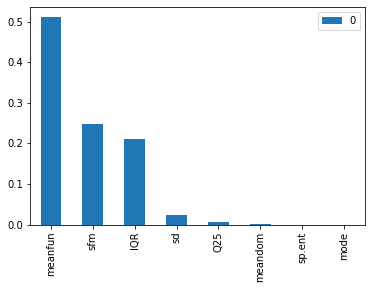

In [ ]:
feature_importance.head(10).plot(kind='bar') #Bar chart with importance of features

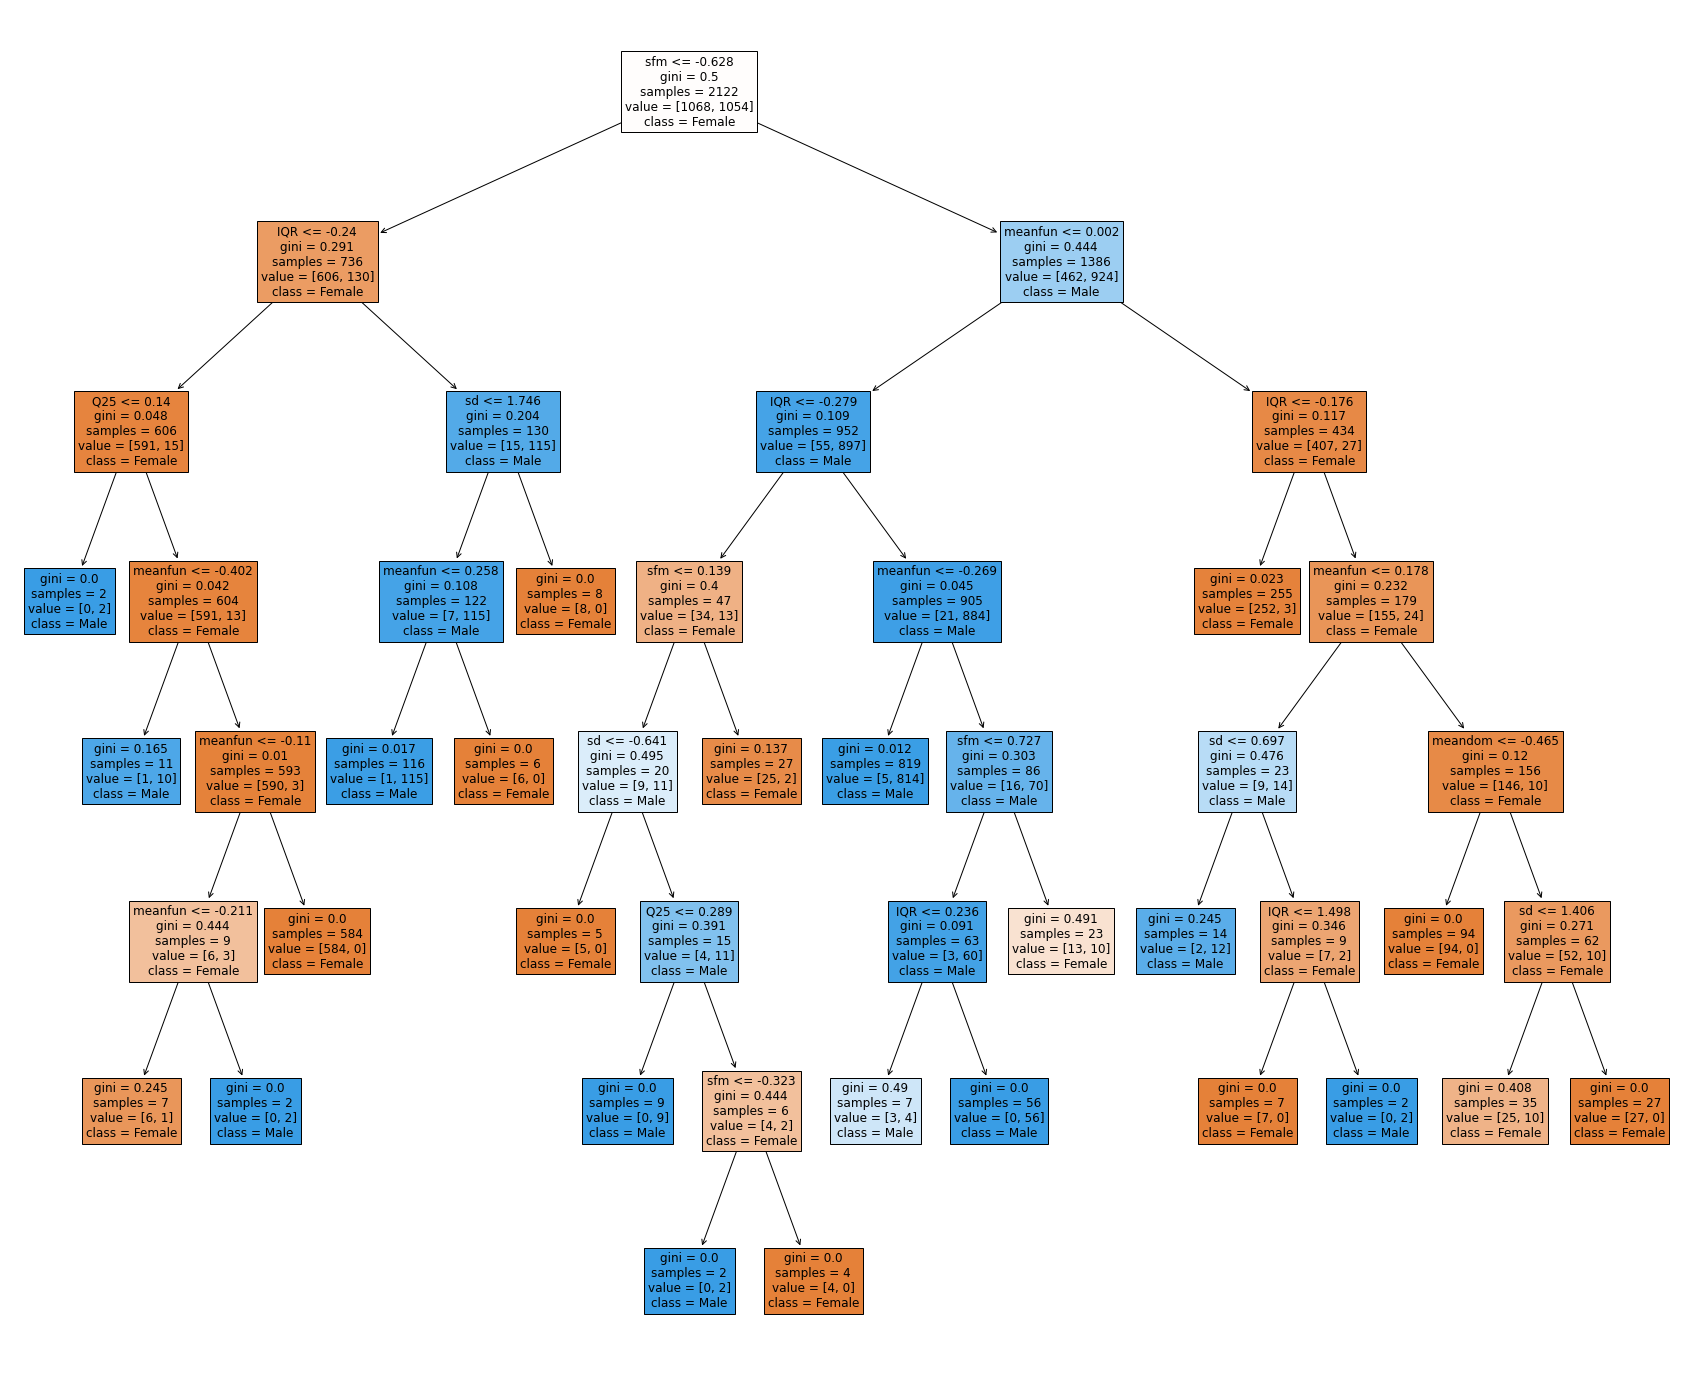

In [ ]:
fig = plt.figure(figsize=(30,25)) #Plotting the Decision Tree
_ = tree.plot_tree(modelDTC,
                   feature_names=feature_names,
                   class_names={0:'Female', 1:'Male'},
                   filled=True,
                   fontsize=12
                  )

### Logistic Regression

In [ ]:
modelLR = LogisticRegression() #creating the LR class with hyperparamas
modelLR.fit(x_train,y_train) #fitting the model with the values and labels

LogisticRegression()

In [ ]:
modelLR.get_params() #get the default paramaters 

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
c_values = [100, 10, 1.0, 0.1, 0.01]
max_iter = [100, 1000, 10000]

grid = dict(solver=solvers,C=c_values,max_iter=max_iter)
LRParams = TuneParam(grid, modelLR, x , y)

Best: 0.970327 using {'C': 0.1, 'max_iter': 100, 'solver': 'newton-cg'}
0.969590 (0.008254) with: {'C': 100, 'max_iter': 100, 'solver': 'newton-cg'}
0.969590 (0.008254) with: {'C': 100, 'max_iter': 100, 'solver': 'lbfgs'}
0.969485 (0.008486) with: {'C': 100, 'max_iter': 100, 'solver': 'liblinear'}
0.969590 (0.008254) with: {'C': 100, 'max_iter': 1000, 'solver': 'newton-cg'}
0.969590 (0.008254) with: {'C': 100, 'max_iter': 1000, 'solver': 'lbfgs'}
0.969485 (0.008486) with: {'C': 100, 'max_iter': 1000, 'solver': 'liblinear'}
0.969590 (0.008254) with: {'C': 100, 'max_iter': 10000, 'solver': 'newton-cg'}
0.969590 (0.008254) with: {'C': 100, 'max_iter': 10000, 'solver': 'lbfgs'}
0.969485 (0.008486) with: {'C': 100, 'max_iter': 10000, 'solver': 'liblinear'}
0.969380 (0.008748) with: {'C': 10, 'max_iter': 100, 'solver': 'newton-cg'}
0.969380 (0.008748) with: {'C': 10, 'max_iter': 100, 'solver': 'lbfgs'}
0.969485 (0.008640) with: {'C': 10, 'max_iter': 100, 'solver': 'liblinear'}
0.969380 (0.00

In [ ]:
modelLR = LogisticRegression(**LRParams) #creating the LR class with hyperparamas
modelLR.fit(x_train,y_train) #fitting the model with the values and labels

LogisticRegression(C=0.1, solver='newton-cg')

In [ ]:
predictionsLR = modelLR.predict(x_test)
predictionsLR #models predictions for each row

array(['female', 'female', 'female', ..., 'male', 'male', 'male'],
      dtype=object)

### LR Evaluation

In [ ]:
pd.crosstab(predictionsLR,y_test,rownames=['matrix'],colnames=['confusion'], margins = True) #Confusion matrix of result

confusion,female,male,All
matrix,,,
female,493,13,506
male,23,517,540
All,516,530,1046


In [ ]:
print("\t\t\tLog Reg Class report:\n",classification_report(predictionsLR,y_test))

			Log Reg Class report:
               precision    recall  f1-score   support

      female       0.96      0.97      0.96       506
        male       0.98      0.96      0.97       540

    accuracy                           0.97      1046
   macro avg       0.97      0.97      0.97      1046
weighted avg       0.97      0.97      0.97      1046



In [ ]:
print("Log Reg Accuracy score: ",accuracy_score(predictionsLR,y_test)*100,"%")
allPred.append(accuracy_score(predictionsLR,y_test)*100)

Log Reg Accuracy score:  96.5583173996176 %


### Support Vector Machine (SVM)

In [ ]:
modelSVM = SVC()
modelSVM.fit(x_train,y_train) #fitting the model with the values and labels

SVC()

In [ ]:
modelSVM.get_params() #get the default paramaters 

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
kernel = ['poly', 'rbf', 'sigmoid', 'linear']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
grid = dict(kernel=kernel,C=C,gamma=gamma)

SVMParams = TuneParam(grid, modelSVM, x_train , y_train)

Best: 0.981147 using {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.973453 (0.012080) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.980675 (0.009848) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.845419 (0.020306) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.970936 (0.013233) with: {'C': 50, 'gamma': 'scale', 'kernel': 'linear'}
0.968741 (0.014270) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.981147 (0.009593) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.845437 (0.021735) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.971094 (0.013380) with: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
0.950833 (0.015849) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.977065 (0.010941) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.851876 (0.023318) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.971565 (0.012799) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'linear'}
0.912510 (0.017593) with: {'C': 0.1, 'gamma': 'scale',

In [ ]:
modelSVM = SVC(**SVMParams) #creating the LR class with hyperparamas
modelSVM.fit(x_train,y_train) #fitting the model with the values and labels

SVC(C=10)

In [ ]:
predictionsSVM = modelSVM.predict(x_test)
predictionsSVM #models predictions for each row

array(['female', 'female', 'female', ..., 'male', 'male', 'male'],
      dtype=object)



### SVM Evaluation


In [ ]:
pd.crosstab(predictionsSVM,y_test,rownames=['matrix'],colnames=['confusion'], margins = True) #Confusion matrix of result

confusion,female,male,All
matrix,,,
female,509,14,523
male,7,516,523
All,516,530,1046


In [ ]:
print("\t\t\tSVM Class report:\n",classification_report(predictionsSVM,y_test))

			SVM Class report:
               precision    recall  f1-score   support

      female       0.99      0.97      0.98       523
        male       0.97      0.99      0.98       523

    accuracy                           0.98      1046
   macro avg       0.98      0.98      0.98      1046
weighted avg       0.98      0.98      0.98      1046



In [ ]:
print("SVM score: ",accuracy_score(predictionsSVM,y_test)*100,"%")
allPred.append(accuracy_score(predictionsSVM,y_test)*100)

SVM score:  97.99235181644359 %


### K-Means Clustering 

In [ ]:
mapping = {'male':1, 'female':0}
y_kmc_train = y_train.map(mapping)
y_kmc_test = y_test.map(mapping)

modelKMC = KMeans(n_clusters=2)
modelKMC.fit(x_train,y_kmc_train) #fitting the model with the values and labels

KMeans(n_clusters=2)

In [ ]:
predictionsKMC = modelKMC.predict(x_test)
predictionsKMC #models predictions for each row

array([1, 1, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
modelKMC.get_params() #get the default paramaters 

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [ ]:
max_iter = [300, 500, 600, 800, 1000, 2000]
algorithm = ["full", "elkan"]

grid = dict(max_iter = max_iter, algorithm=algorithm)
y_kmc= y.map(mapping)
KMCParams = TuneParam(grid, modelKMC, x , y_kmc)

Best: 0.562105 using {'algorithm': 'full', 'max_iter': 600}
0.478270 (0.336721) with: {'algorithm': 'full', 'max_iter': 300}
0.455447 (0.334467) with: {'algorithm': 'full', 'max_iter': 500}
0.562105 (0.331433) with: {'algorithm': 'full', 'max_iter': 600}
0.546307 (0.334228) with: {'algorithm': 'full', 'max_iter': 800}
0.457484 (0.334732) with: {'algorithm': 'full', 'max_iter': 1000}
0.496979 (0.337188) with: {'algorithm': 'full', 'max_iter': 2000}
0.457939 (0.334789) with: {'algorithm': 'elkan', 'max_iter': 300}
0.520675 (0.336787) with: {'algorithm': 'elkan', 'max_iter': 500}
0.524501 (0.336530) with: {'algorithm': 'elkan', 'max_iter': 600}
0.549562 (0.333761) with: {'algorithm': 'elkan', 'max_iter': 800}
0.480762 (0.336872) with: {'algorithm': 'elkan', 'max_iter': 1000}
0.363168 (0.308431) with: {'algorithm': 'elkan', 'max_iter': 2000}


In [ ]:
modelKMC =  KMeans(n_clusters=2, **KMCParams) #creating the LR class with hyperparamas
modelKMC.fit(x_train,y_kmc_train) #fitting the model with the values and labels

KMeans(algorithm='full', max_iter=600, n_clusters=2)

In [ ]:
predictionsKMC = modelKMC.predict(x_test)
predictionsKMC #models predictions for each row

array([0, 0, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
pd.crosstab(predictionsKMC,y_test,rownames=['matrix'],colnames=['confusion'], margins = True) #Confusion matrix of result

confusion,female,male,All
matrix,,,
0,372,14,386
1,144,516,660
All,516,530,1046


In [ ]:
print("\t\t\tKMC Class report:\n",classification_report(predictionsKMC,y_kmc_test))

			KMC Class report:
               precision    recall  f1-score   support

           0       0.72      0.96      0.82       386
           1       0.97      0.78      0.87       660

    accuracy                           0.85      1046
   macro avg       0.85      0.87      0.85      1046
weighted avg       0.88      0.85      0.85      1046



In [ ]:
print("KMC score: ", accuracy_score(predictionsKMC,y_kmc_test)*100,"%")
allPred.append(accuracy_score(predictionsKMC,y_kmc_test)*100)

KMC score:  84.89483747609943 %


Artificial Neural Network (ANN)

In [ ]:
modelANN = MLPClassifier() 

In [ ]:
modelANN.get_params() #get the default paramaters 

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [ ]:
activation = ['tanh', 'relu']
learning_rate = ['constant', 'adaptive']
n_iter_no_change = [50, 100, 150, 200]
grid = dict(max_iter = [2000], early_stopping = [True], activation=activation, learning_rate=learning_rate, n_iter_no_change=n_iter_no_change)
ANNParams = TuneParam(grid, modelANN, x.values , y)

Best: 0.975275 using {'activation': 'relu', 'early_stopping': True, 'learning_rate': 'constant', 'max_iter': 2000, 'n_iter_no_change': 200}
0.969797 (0.007744) with: {'activation': 'tanh', 'early_stopping': True, 'learning_rate': 'constant', 'max_iter': 2000, 'n_iter_no_change': 50}
0.968959 (0.007520) with: {'activation': 'tanh', 'early_stopping': True, 'learning_rate': 'constant', 'max_iter': 2000, 'n_iter_no_change': 100}
0.972746 (0.007928) with: {'activation': 'tanh', 'early_stopping': True, 'learning_rate': 'constant', 'max_iter': 2000, 'n_iter_no_change': 150}
0.974433 (0.008203) with: {'activation': 'tanh', 'early_stopping': True, 'learning_rate': 'constant', 'max_iter': 2000, 'n_iter_no_change': 200}
0.967906 (0.007703) with: {'activation': 'tanh', 'early_stopping': True, 'learning_rate': 'adaptive', 'max_iter': 2000, 'n_iter_no_change': 50}
0.970431 (0.008304) with: {'activation': 'tanh', 'early_stopping': True, 'learning_rate': 'adaptive', 'max_iter': 2000, 'n_iter_no_change

In [ ]:
modelANN = MLPClassifier(**ANNParams)

modelANN.fit(x_train.values ,y_train)  

MLPClassifier(early_stopping=True, max_iter=2000, n_iter_no_change=200)

In [ ]:
predictionsANN = modelANN.predict(x_test)
predictionsANN #models predictions for each row

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


array(['female', 'female', 'female', ..., 'male', 'male', 'male'],
      dtype='<U6')

In [ ]:
pd.crosstab(predictionsANN,y_test,rownames=['matrix'],colnames=['confusion'], margins = True) #Confusion matrix of result

confusion,female,male,All
matrix,,,
female,501,13,514
male,15,517,532
All,516,530,1046


In [ ]:
print("\t\t\tANN Class report:\n",classification_report(predictionsANN,y_test))

			ANN Class report:
               precision    recall  f1-score   support

      female       0.97      0.97      0.97       514
        male       0.98      0.97      0.97       532

    accuracy                           0.97      1046
   macro avg       0.97      0.97      0.97      1046
weighted avg       0.97      0.97      0.97      1046



In [ ]:
print("ANN score: ", accuracy_score(predictionsANN, y_test)*100,"%")
allPred.append(accuracy_score(predictionsANN,y_test)*100)

ANN score:  97.32313575525812 %


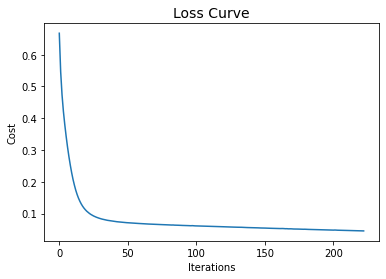

In [ ]:
plt.plot(modelANN.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

### Checking each model's accuracy

In [ ]:
d =['Decision Tree Classifier','Logistic Regression','Support Vector Machine','K-means Clustering', 'Artificial Neural Network']
a={} 
k=0
for i in d:
    a[i] = allPred[k]
    k+=1

In [ ]:
sort_data = sorted(a.items(), key=lambda x: x[1], reverse=True)

In [ ]:
for i in sort_data:
    print(i[0], i[1])

Support Vector Machine 97.99235181644359
Artificial Neural Network 97.32313575525812
Decision Tree Classifier 97.22753346080306
Logistic Regression 96.5583173996176
K-means Clustering 84.89483747609943
